<a href="https://colab.research.google.com/github/BhagyaPS2001/DataScienceMl/blob/main/Bhagya_()_CO2_Forecast_Sales_Using_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement

As an owner of a startup, you wish to forecast the sales of your product to plan how much money should be spent on advertisements. This is because the sale of a product is usually proportional to the money spent on advertisements.

Predict the impact of TV advertising on your product sales by performing simple linear regression analysis.





---

### List of Activities

**Activity 1:** Analysing the dataset

  
**Activity 2:**  Train-Test split

**Activity 3:**  Model training

**Activity 4:** Plotting the best fit line

**Activity 5:** Model prediction





---


#### Activity 1:  Analysing the Dataset

Create a Pandas DataFrame for **Advertising-Sales** dataset using the below link. This dataset contains information about the money spent on the TV, radio and newspaper advertisement (in thousand dollars) and their generated sales (in thousand units). The dataset consists of examples that are divided by 1000.

**Dataset Link:** https://raw.githubusercontent.com/BhagyaPS2001/DataScienceMl/main/advertising%20-%20advertising.csv

Also, print the first five rows of the dataset. Check for null values and treat them accordingly.




In [6]:
# Import modules
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
# Load the dataset
df=pd.read_csv("https://raw.githubusercontent.com/BhagyaPS2001/DataScienceMl/main/advertising%20-%20advertising.csv")
# Print first five rows using head() function
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [2]:
# Check if there are any null values. If any column has null values, treat them accordingly
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

---

#### Activity 2: Train-Test Split

For simple linear regression, consider only the effect of **TV ads** on sales. Thus, `TV` is the feature variable and `Sales` is the target variable.

Split the dataset into training set and test set such that the training set contains 67% of the instances and the remaining instances will become the test set.




In [5]:
# Split the DataFrame into the training and test sets.
x=df["TV"]
y=df["Sales"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=0)

---

#### Activity 3: Model Training

Train the simple regression model using **training data** to obtain the best fit line $y = mx + c$.



In [8]:
# Calculate the slope and intercept values for the best fit line.
x_trainReshaped=x_train.values.reshape(-1,1)
x_testReshaped=x_test.values.reshape(-1,1)
y_trainReshaped=y_train.values.reshape(-1,1)
y_testReshaped=y_test.values.reshape(-1,1)

from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_trainReshaped,y_trainReshaped)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[0.05452888]]
[7.12887806]


**Q:** What is the equation obtained for the best fit line of this model?

**A:** y = 0.0545*x + 7.1288

---

#### Activity 4: Plotting the Best Fit Line

After obtaining the slope and intercept values for the best fit line, plot this line along with the scatter plot to see how well it fits the points.


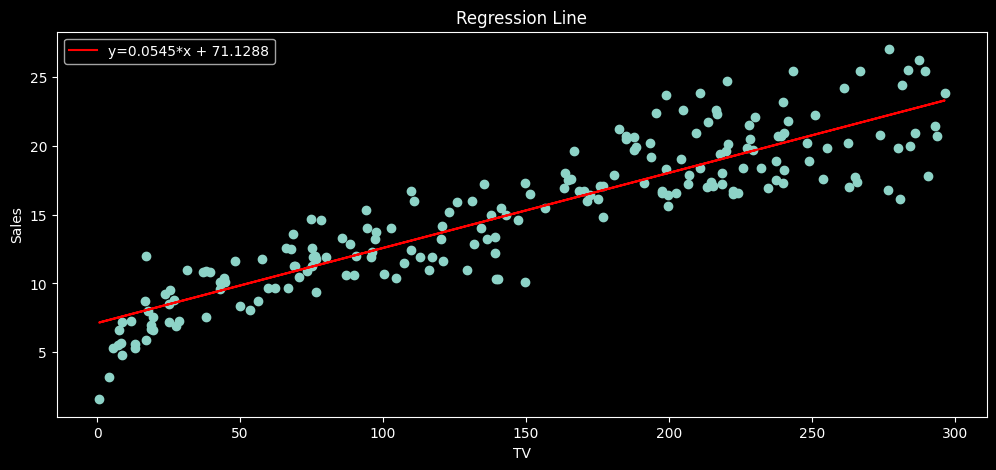

In [16]:
#  Plot the regression line in the scatter plot between Sales and TV advertisment values.
import matplotlib.pyplot as plt
plt.style.use("dark_background")
plt.figure(figsize=(12,5))
plt.title("Regression Line")
plt.scatter(x,y)
plt.plot(x,0.0545*x + 7.1288,color="r",label="y=0.0545*x + 71.1288")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.show()

---

#### Activity 5: Model Prediction

For the TV advertising of $50,000, what is prediction for Sales? In order to predict this value, perform the following task:

- Based on the regression line, create a function `sales_predicted()` which takes a budget to be used for TV advertising as an input and returns the corresponding units of Sales.
- Call the function `sales_predicted()` and pass the amount spent on TV advertising.

**Note:** To predict the sales for TV advertising of $50,000, pass 50 as parameter to `sales_predicted()` function as the original data of this dataset consists of examples that are divided by 1000. Also, the value obtained after calling `sales_predicted(50)` must be multiplied by 1000 to obtain the predicted units of sales.



In [18]:
#Create a function which takes TV advertisement value as an input and returns the sales.
def salesValue(tv_reg):
  return 0.0545*tv_reg + 7.1288

# Calculating sales value against $50,000 spent in TV ads
s=salesValue(50)
round(s*1000)

9854

**Q:** If you are planning to invest $50,000 dollars in TV advertising, how many unit of sales can be predicted according to this simple linear regression model?

**A:** 9854

---